In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. First Model

## 1.1 Import Data

### 1.1.1 Import Diabetes Data

In [2]:
path_diabetes = Path('IHME_USA_COUNTY_DIABETES_PREVALENCE_1999_2012_NATIONAL_Y2016M08D23.XLSX')
df_diabetes = pd.read_excel(path_diabetes)

### 1.1.2 Import Race Data

In [3]:
path_race = Path('county_demographics.csv')
df_race = pd.read_csv(path_race)

### 1.1.3 Import Income Data

In [4]:
path_income = Path('lapi1124.xlsx')
df_income = pd.read_excel(path_income)

### 1.1.4 Import Education Data

In [5]:
path_education = Path('Education.xlsx')
df_education = pd.read_excel(path_education)

## 1.2 Observe Data

### 1.2.1 Observe Diabetes Data

In [6]:
df_diabetes

,"Diagnosed and Undiagnosed Diabetes Prevalence by County in the U.S., 1999-2012 (Diabetes Care, 2016)",Unnamed: 1
0,NaN,NaN
1,Tab name,Description
2,Diagnosed,The proportion of adults age 20+ who report a ...
3,Undiagnosed,The proportion of adults age 20+ who do not re...
4,Total,The proportion of adults age 20+ who report a ...
5,Awareness,The proportion of adults age 20+ with a previo...
6,Control,The proportion of adults age 20+ with a previo...
7,NaN,*High FPG/A1C is fasting plasma glucose at lea...
8,NaN,NaN
9,Data citation: Institute for Health Metrics an...,NaN


In [8]:
df_diabetes = pd.read_excel(path_diabetes, sheet_name=None)
df_diabetes.keys()

dict_keys(['Overview', 'Diagnosed', 'Undiagnosed', 'Total', 'Awareness', 'Control'])

Conclusion: The excel file has 6 sheets and what we need is the data in the 'Diagnosed' sheet.

In [9]:
df_diabetes = pd.read_excel(path_diabetes, sheet_name='Diagnosed')
df_diabetes

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females","Prevalence, 2001, Males","Prevalence, 2002, Both Sexes","Prevalence, 2002, Females","Prevalence, 2002, Males","Prevalence, 2003, Both Sexes","Prevalence, 2003, Females","Prevalence, 2003, Males","Prevalence, 2004, Both Sexes","Prevalence, 2004, Females","Prevalence, 2004, Males","Prevalence, 2005, Both Sexes","Prevalence, 2005, Females","Prevalence, 2005, Males","Prevalence, 2006, Both Sexes","Prevalence, 2006, Females","Prevalence, 2006, Males","Prevalence, 2007, Both Sexes","Prevalence, 2007, Females","Prevalence, 2007, Males","Prevalence, 2008, Both Sexes","Prevalence, 2008, Females","Prevalence, 2008, Males","Prevalence, 2009, Both Sexes","Prevalence, 2009, Females","Prevalence, 2009, Males","Prevalence, 2010, Both Sexes","Prevalence, 2010, Females","Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,7.65,7.7,7.44,7.98,8.11,7.81,8.42,8.11,7.79,8.44,8.55,8.19,8.93,8.94,8.46,9.46,9.29,8.97,9.63,9.39,9.01,9.8,9.65,9.27,10.05,9.82,9.45,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,9.1,9.25,9.12,9.39,9.66,9.54,9.78,9.66,9.55,9.78,10.17,10.01,10.33,10.6,10.34,10.88,11.02,11.01,11.04,11.1,11.03,11.17,11.42,11.4,11.44,11.63,11.66,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,8.89,8.99,8.77,9.22,9.39,9.14,9.66,9.38,9.11,9.68,9.66,9.29,10.05,10.16,9.68,10.66,10.36,10.06,10.67,10.53,10.23,10.85,10.7,10.38,11.05,10.94,10.68,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,8.09,7.41,6.55,8.32,7.73,6.87,8.64,7.69,6.86,8.58,8.11,7.23,9.05,8.49,7.51,9.53,8.75,7.96,9.59,8.84,8.06,9.67,9.29,8.57,10.06,9.41,8.75,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,6.69,6.54,6.07,7.04,6.97,6.48,7.48,7.02,6.54,7.53,7.38,6.88,7.91,7.77,7.2,8.38,8.1,7.68,8.55,8.18,7.65,8.75,8.52,8.01,9.06,8.84,8.35,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,3.97,4.01,3.91,4.11,4.25,4.14,4.36,4.29,4.18,4.41,4.6,4.48,4.73,4.86,4.69,5.04,5.17,5.09,5.24,5.16,4.99,5.34,5.36,5.2,5.52,5.7,5.58,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,5.97,6.19,6.09,6.31,6.62,6.5,6.74,6.54,6.37,6.71,6.89,6.66,7.15,7.15,6.83,7.49,7.48,7.3,7.68,7.52,7.23,7.83,7.7,7.4,8.03,8.01,7.68,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,5.82,6.44,6.76,6.1,6.68,6.91,6.43,6.66,6.84,6.47,7.06,7.19,6.92,

In [11]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Age-Standardized Diagnosed Diabetes Prevalence (%)  3195 non-null   object
 1   Unnamed: 1                                          3194 non-null   object
 2   Unnamed: 2                                          3195 non-null   object
 3   Unnamed: 3                                          3195 non-null   object
 4   Unnamed: 4                                          3195 non-null   object
 5   Unnamed: 5                                          3195 non-null   object
 6   Unnamed: 6                                          3195 non-null   object
 7   Unnamed: 7                                          3195 non-null   object
 8   Unnamed: 8                                          3195 non-null   object
 9   Unnamed:

In [13]:
df_diabetes.isnull().sum()

Age-Standardized Diagnosed Diabetes Prevalence (%)    0
Unnamed: 1                                            1
Unnamed: 2                                            0
Unnamed: 3                                            0
Unnamed: 4                                            0
Unnamed: 5                                            0
Unnamed: 6                                            0
Unnamed: 7                                            0
Unnamed: 8                                            0
Unnamed: 9                                            0
Unnamed: 10                                           0
Unnamed: 11                                           0
Unnamed: 12                                           0
Unnamed: 13                                           0
Unnamed: 14                                           0
Unnamed: 15                                           0
Unnamed: 16                                           0
Unnamed: 17                                     

In [14]:
df_diabetes.describe()

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
count,3195,3194,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.0,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.0,3195.00,3195,3195.00,3195.00,3195.00,3195.00,3195.00,3195.0,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.0,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00
unique,1929,3194,631.00,700.00,577.00,680.00,751.00,624.00,695.0,757.00,642.00,706.00,769.00,651.00,727.00,786.0,659.00,731,794.00,674.00,763.00,832.00,710.00,777.0,839.00,727.00,808.00,879.00,734.00,798.00,873.00,749.00,823.00,892.00,762.00,823.00,894.00,765.00,830.00,906.00,770.0,848.00,925.00,792.00,2120.00,2231.00,2077.00
top,Washington County,FIPS,6.45,6.24,6.52,6.93,5.71,6.09,7.4,5.81,7.57,7.86,6.26,7.93,8.06,7.9,8.11,8,7.45,8.16,8.83,7.88,9.08,8.8,8.27,8.98,9.58,8.92,9.59,7.78,9.25,9.84,9.57,9.33,10.47,10.77,9.64,9.91,9.78,9.53,10.6,8.47,9.74,9.31,56.71,68.78,59.13
freq,30,1,19.00,20.00,20.00,18.00,16.00,18.00,19.0,16.00,17.00,19.00,17.00,20.00,18.00,17.0,17.00,15,16.00,20.00,16.00,17.00,16.00,15.0,17.00,15.00,15.00,13.00,15.00,15.00,14.00,15.00,14.00,14.00,15.00,15.00,16.00,14.00,13.00,14.00,17.0,15.00,15.00,14.00,11.00,7.00,8.00


### 1.2.2 Observe Race Data

In [10]:
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,27.6,1.6,0.0,1.4,70.2,68.9,75.0,9660,12245,90800,2.46,38741,22646,1.8,490.48,2.8,90.4,598825,28.1,51.6,1559,24295,25417,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,18.0,2.8,0.0,1.6,79.7,77.3,71.1,22236,26657,118000,2.76,43396,23122,1.3,655.12,10.0,89.8,-1,28.9,51.1,2690,57576,61773,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,28.8,9.1,0.2,1.7,67.8,59.9,66.8,13438,21319,171800,2.35,46073,26018,7.7,449.50,11.5,93.0,667932,22.9,51.3,2606,33413,33164,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,1.4,8.5,0.2,3.0,91.9,84.3,69.3,173353,192630,270800,2.58,66293,34919,5.8,1052.58,8.7,83.7,-1,20.7,49.9,29924,494967,392365,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,0.6,2.5,0.0,1.2,97.4,95.1,74.3,3200,3718,104600,2.17,53363,30822,1.6,569.27,3.2,86.1,-1,25.1,50.2,492,7496,7682,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma County,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,2.6,64.6,0.3,2.1,91.2,30.1,67.1,73098,94641,127900,2.79,45243,21758,26.3,5513.99,53.2,82.6,884322,20.5,48.5,15382,203881,195751,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma County,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,0.6,25.1,0.2,1.1,96.5,72.9,66.9,4028,4565,191800,2.45,52022,27955,12.1,2364.41,18.6,84.9,164774,15.4,49.9,525,9988,10043,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata County,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,0.6,94.7,0.0,0.4,98.4,4.6,74.8,4503,6544,77800,3.17,33952,20169,24.5,998.41,89.3,87.5,-1,21.4,50.3,408,13889,14018,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala County,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,1.3,94.0,0.2,0.7,96.5,4.9,72.0,3571,4415,50000,3.33,34459,13835,7.1,1297.41,72.2,89.3,-1,15.9,49.1,383,9670,11677,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [15]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3139 non-null   object 
 1   State                                                         3139 non-null   object 
 2   Age.Percent 65 and Older                                      3139 non-null   float64
 3   Age.Percent Under 18 Years                                    3139 non-null   float64
 4   Age.Percent Under 5 Years                                     3139 non-null   float64
 5   Education.Bachelor's Degree or Higher                         3139 non-null   float64
 6   Education.High School or Higher                               3139 non-null   float64
 7   Employment.Nonemployer Establishments                         3139 no

In [16]:
df_race.isnull().sum()

County                                                          0
State                                                           0
Age.Percent 65 and Older                                        0
Age.Percent Under 18 Years                                      0
Age.Percent Under 5 Years                                       0
Education.Bachelor's Degree or Higher                           0
Education.High School or Higher                                 0
Employment.Nonemployer Establishments                           0
Ethnicities.American Indian and Alaska Native Alone             0
Ethnicities.Asian Alone                                         0
Ethnicities.Black Alone                                         0
Ethnicities.Hispanic or Latino                                  0
Ethnicities.Native Hawaiian and Other Pacific Islander Alone    0
Ethnicities.Two or More Races                                   0
Ethnicities.White Alone                                         0
Ethnicitie

In [17]:
df_race.describe()

,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03,3.139000e+03,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3.139000e+03,3.139000e+03,3139.000000,3.139000e+03,3.139000e+03,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03
mean,19.759828,21.914431,5.750430,21.981841,86.951927,8.360340e+03,2.317936,1.573463,9.360593,9.773813,0.075916,2.179006,84.394425,75.839917,71.594775,3.846716e+04,4.399110e+04,1.536897e+05,2.511848,53479.671870,28079.605288,4.771392,1108.150659,9.572412,87.070373,1.591832e+06,23.852278,49.887416,5807.162154,1.055806e+05,9.834617e+04,259.362982,2.190356e+05,1.342061e+06,9.015300e+03,3154.674737,4799.379102,2536.359669,6128.747053,811.652437,7.741874e+03
std,4.807341,3.468644,1.106273,9.569848,6.258044,3.361605e+04,7.424452,2.954798,14.451943,13.870306,1.009275,1.570924,16.286884,20.142490,8.345839,1.167282e+05,1.300049e+05,9.544406e+04,0.269624,14183.171708,6770.234938,5.736329,3553.504302,11.694377,4.336621,6.370297e+06,5.868546,2.271177,14074.930409,3.359562e+05,3.130844e+05,1725.202893,9.826798e+05,4.472977e+06,3.418417e+04,12967.392485,18048.045913,17156.641150,17744.464030,2469.515227,3.062213e+04
min,4.900000,-1.000000,-1.000000,0.000000,26.400000,-1.000000e+00,-1.000000,-1.000000,-1.000000,0.600000,-1.000000,-1.000000,8.000000,2.700000,-1.000000,3.000000e+01,-1.000000e+00,-1.000000e+00,1.410000,21504.000000,10739.000000,0.000000,2.000000,0.000000,55.000000,-1.000000e+00,-1.000000,26.500000,-1.000000,6.400000e+01,8.200000e+01,0.000000,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,16.700000,19.900000,5.100000,15.400000,83.350000,7.270000e+02,0.400000,0.500000,0.900000,2.500000,0.000000,1.400000,79.600000,64.100000,67.500000,4.281000e+03,5.335500e+03,9.780000e+04,2.340000,44163.500000,23616.500000,1.400000,430.725000,2.900000,84.800000,-1.000000e+00,19.800000,49.400000,707.000000,1.083950e+04,1.113500e+04,17.000000,1.537000e+03,8.602400e+04,8.955000e+02,270.000000,470.500000,41.000000,729.000000,87.000000,7.370000e+02
50%,19.400000,21.900000,5.700000,19.600000,88.300000,1.658000e+03,0.700000,0.800000,2.500000,4.500000,0.100000,1.800000,91.300000,83.200000,72.900000,9.940000e+03,1.238100e+04,1.279000e+05,2.480000,51765.000000,27308.000000,2.700000,615.560000,5.300000,87.600000,1.550370e+05,23.700000,50.300000,1694.000000,2.575000e+04,2.589300e+04,45.200000,2.563500e+04,2.629

### 1.2.3 Observe Income Data

In [18]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224 entries, 0 to 3223
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Table 1. Per Capita Personal Income, by County, 2021–2023  3170 non-null   object 
 1   Unnamed: 1                                                 3168 non-null   object 
 2   Unnamed: 2                                                 3166 non-null   float64
 3   Unnamed: 3                                                 3166 non-null   float64
 4   Unnamed: 4                                                 3167 non-null   object 
 5   Unnamed: 5                                                 3168 non-null   object 
 6   Unnamed: 6                                                 3166 non-null   float64
 7   Unnamed: 7                                                 3167 non-null   object 
dtypes: float6

In [21]:
df_income.isnull().sum()

Table 1. Per Capita Personal Income, by County, 2021–2023    54
Unnamed: 1                                                   56
Unnamed: 2                                                   58
Unnamed: 3                                                   58
Unnamed: 4                                                   57
Unnamed: 5                                                   56
Unnamed: 6                                                   58
Unnamed: 7                                                   57
dtype: int64

In [22]:
df_income.describe()

,Unnamed: 2,Unnamed: 3,Unnamed: 6
count,3166.000000,3166.000000,3166.000000
mean,55576.690145,58017.679406,5.036639
std,17371.756905,18661.024789,36.141942
min,2022.000000,2023.000000,-28.000000
25%,45682.500000,47717.000000,3.300000
50%,51916.500000,54087.000000,4.900000
75%,60952.000000,63599.000000,6.100000
max,418669.000000,471751.000000,2023.000000


### 1.2.4 Observe Education Data

In [23]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college (1-3...,Percent of adults completing four years of col...,"Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college (1-3...,Percent of adults completing four years of col...,"Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,11717266,47.7,31.1,10.6,10.7,44535197,45947035,20794975,21558480,33.5,34.6,15.7,16.2,39343718,47642763,39571702,32310253,24.8,30,24.9,20.3,35715625,52168981,49864428,44462605,19.6,28.6,27.4,24.4,29179819,57706852,59244324,58205022,14.280311,28.241155,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,Na

In [24]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 55 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022  3297 non-null   object
 1   Unnamed: 1                                                                                                 3295 non-null   object
 2   Unnamed: 2                                                                                                 3295 non-null   object
 3   Unnamed: 3                                                                                                 3222 non-null   object
 4   Unnamed: 4                                                                    

In [25]:
df_education.isnull().sum()

Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022      0
Unnamed: 1                                                                                                     2
Unnamed: 2                                                                                                     2
Unnamed: 3                                                                                                    75
Unnamed: 4                                                                                                    75
Unnamed: 5                                                                                                    75
Unnamed: 6                                                                                                    74
Unnamed: 7                                                                                                   110
Unnamed: 8                                                                                      

In [26]:
df_education.describe()

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
count,3297,3295,3295,3222,3222,3222,3223,3187,3187,3187,3187,3187,3187,3187.0,3187.0,3268,3268,3268,3268,3268.0,3268.0,3268.0,3268.0,3272,3272,3272,3272,3272.0,3272.0,3271.0,3272.0,3273,3273,3273,3273,3273.0,3273.0,3273.0,3273.0,3275,3275,3275,3275,3275.000000,3275.000000,3275.000000,3275,3276,3276,3276,3276,3276.000000,3276.000000,3276.000000,3276.000000
unique,3297,54,2028,13,13,10,10,2895,2695,2019,1859,559,373,195.0,232.0,2993,2909,2427,2333,580.0,359.0,242.0,296.0,2922,2957,2753,2438,520.0,334.0,306.0,327.0,2891,2995,2908,2687,446.0,352.0,289.0,374.0,2772,3042,2976,2782,3273.000000,3274.000000,3273.000000,3271,2678,3012,3019,2876,3270.000000,3271.000000,3275.000000,3274.000000
top,"Note: For 1970 and 1980, the share of adults w...",TX,Washington County,2,2,6,9,2139,1378,612,522,50,35,8.9,4.8,4803,1714,151,226,33.6,39.9,9.9,8.1,4876,2290,770,496,22.5,32.4,23.4,10.8,938,1414,3129,623,18.8,34.8,26.3,12.8,268,1590,1206,959,12.465743,19.062746,33.044688,20,370,2502,3555,911,5.357143,39.655172,15.037475,62.636093
freq,1,255,30,703,764,597,590,4,5,8,11,23,28,46.0,64.0,4,4,7,7,20.0,25.0,39.0,49.0,4,5,5,6,24.0,33.0,32.0,43.0,4,4,5,6,24.0,29.0,34.0,37.0,4,4,4,5,2.000000,2.000000,2.000000,3,5,4,4,4,2.000000,2.000000,2.000000,2.000000


## 1.3 Data Processing

### 1.3.1 Processing Data for Diabetes

In [27]:
df_diabetes

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females","Prevalence, 2001, Males","Prevalence, 2002, Both Sexes","Prevalence, 2002, Females","Prevalence, 2002, Males","Prevalence, 2003, Both Sexes","Prevalence, 2003, Females","Prevalence, 2003, Males","Prevalence, 2004, Both Sexes","Prevalence, 2004, Females","Prevalence, 2004, Males","Prevalence, 2005, Both Sexes","Prevalence, 2005, Females","Prevalence, 2005, Males","Prevalence, 2006, Both Sexes","Prevalence, 2006, Females","Prevalence, 2006, Males","Prevalence, 2007, Both Sexes","Prevalence, 2007, Females","Prevalence, 2007, Males","Prevalence, 2008, Both Sexes","Prevalence, 2008, Females","Prevalence, 2008, Males","Prevalence, 2009, Both Sexes","Prevalence, 2009, Females","Prevalence, 2009, Males","Prevalence, 2010, Both Sexes","Prevalence, 2010, Females","Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,7.65,7.7,7.44,7.98,8.11,7.81,8.42,8.11,7.79,8.44,8.55,8.19,8.93,8.94,8.46,9.46,9.29,8.97,9.63,9.39,9.01,9.8,9.65,9.27,10.05,9.82,9.45,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,9.1,9.25,9.12,9.39,9.66,9.54,9.78,9.66,9.55,9.78,10.17,10.01,10.33,10.6,10.34,10.88,11.02,11.01,11.04,11.1,11.03,11.17,11.42,11.4,11.44,11.63,11.66,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,8.89,8.99,8.77,9.22,9.39,9.14,9.66,9.38,9.11,9.68,9.66,9.29,10.05,10.16,9.68,10.66,10.36,10.06,10.67,10.53,10.23,10.85,10.7,10.38,11.05,10.94,10.68,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,8.09,7.41,6.55,8.32,7.73,6.87,8.64,7.69,6.86,8.58,8.11,7.23,9.05,8.49,7.51,9.53,8.75,7.96,9.59,8.84,8.06,9.67,9.29,8.57,10.06,9.41,8.75,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,6.69,6.54,6.07,7.04,6.97,6.48,7.48,7.02,6.54,7.53,7.38,6.88,7.91,7.77,7.2,8.38,8.1,7.68,8.55,8.18,7.65,8.75,8.52,8.01,9.06,8.84,8.35,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,3.97,4.01,3.91,4.11,4.25,4.14,4.36,4.29,4.18,4.41,4.6,4.48,4.73,4.86,4.69,5.04,5.17,5.09,5.24,5.16,4.99,5.34,5.36,5.2,5.52,5.7,5.58,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,5.97,6.19,6.09,6.31,6.62,6.5,6.74,6.54,6.37,6.71,6.89,6.66,7.15,7.15,6.83,7.49,7.48,7.3,7.68,7.52,7.23,7.83,7.7,7.4,8.03,8.01,7.68,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,5.82,6.44,6.76,6.1,6.68,6.91,6.43,6.66,6.84,6.47,7.06,7.19,6.92,

In [28]:
df_diabetes.columns = df_diabetes.iloc[0]  # Set the first row as the header
df_diabetes = df_diabetes[1:]  # Drop the first row from the DataFrame
df_diabetes = df_diabetes.reset_index(drop=True)  # Reset the index if needed
df_diabetes

,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females","Prevalence, 2001, Males","Prevalence, 2002, Both Sexes","Prevalence, 2002, Females","Prevalence, 2002, Males","Prevalence, 2003, Both Sexes","Prevalence, 2003, Females","Prevalence, 2003, Males","Prevalence, 2004, Both Sexes","Prevalence, 2004, Females","Prevalence, 2004, Males","Prevalence, 2005, Both Sexes","Prevalence, 2005, Females","Prevalence, 2005, Males","Prevalence, 2006, Both Sexes","Prevalence, 2006, Females","Prevalence, 2006, Males","Prevalence, 2007, Both Sexes","Prevalence, 2007, Females","Prevalence, 2007, Males","Prevalence, 2008, Both Sexes","Prevalence, 2008, Females","Prevalence, 2008, Males","Prevalence, 2009, Both Sexes","Prevalence, 2009, Females","Prevalence, 2009, Males","Prevalence, 2010, Both Sexes","Prevalence, 2010, Females","Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
0,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,7.65,7.7,7.44,7.98,8.11,7.81,8.42,8.11,7.79,8.44,8.55,8.19,8.93,8.94,8.46,9.46,9.29,8.97,9.63,9.39,9.01,9.8,9.65,9.27,10.05,9.82,9.45,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
1,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,9.1,9.25,9.12,9.39,9.66,9.54,9.78,9.66,9.55,9.78,10.17,10.01,10.33,10.6,10.34,10.88,11.02,11.01,11.04,11.1,11.03,11.17,11.42,11.4,11.44,11.63,11.66,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
2,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,8.89,8.99,8.77,9.22,9.39,9.14,9.66,9.38,9.11,9.68,9.66,9.29,10.05,10.16,9.68,10.66,10.36,10.06,10.67,10.53,10.23,10.85,10.7,10.38,11.05,10.94,10.68,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
3,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,8.09,7.41,6.55,8.32,7.73,6.87,8.64,7.69,6.86,8.58,8.11,7.23,9.05,8.49,7.51,9.53,8.75,7.96,9.59,8.84,8.06,9.67,9.29,8.57,10.06,9.41,8.75,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
4,Barbour County,1005,9.52,9.4,9.64,10.2,10.08,10.33,10.84,10.75,10.93,11.2,11.15,11.25,11.64,11.59,11.69,11.75,11.72,11.78,12.17,12.08,12.28,13.29,13.12,13.48,13.56,13.65,13.47,13.44,13.45,13.43,14.41,14.47,14.34,13.75,13.73,13.77,14.37,14.42,14.31,14.65,14.7,14.59,51.3,56.33,53.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,6.69,6.54,6.07,7.04,6.97,6.48,7.48,7.02,6.54,7.53,7.38,6.88,7.91,7.77,7.2,8.38,8.1,7.68,8.55,8.18,7.65,8.75,8.52,8.01,9.06,8.84,8.35,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3190,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,3.97,4.01,3.91,4.11,4.25,4.14,4.36,4.29,4.18,4.41,4.6,4.48,4.73,4.86,4.69,5.04,5.17,5.09,5.24,5.16,4.99,5.34,5.36,5.2,5.52,5.7,5.58,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3191,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,5.97,6.19,6.09,6.31,6.62,6.5,6.74,6.54,6.37,6.71,6.89,6.66,7.15,7.15,6.83,7.49,7.48,7.3,7.68,7.52,7.23,7.83,7.7,7.4,8.03,8.01,7.68,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3192,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,5.82,6.44,6.76,6.1,6.68,6.91,6.43,6.66,6.84,6.47,7.06,7.19,6.92,7.27,7.26,7.29,7.54,7.6,7.48,7.69,7.64,7.75,7.79,7.63,7.96,7.88,7.7,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


In [29]:
df_diabetes = df_diabetes.drop(['Percent Change, 1999-2012, Males',
                              'Percent Change, 1999-2012, Females','Percent Change, 1999-2012, Both Sexes'], axis=1)    
# drop the last few columns
df_diabetes = df_diabetes.drop(columns=[col for col in df_diabetes.columns if 'Male' in col or 'Female' in col])   # just keep both sexes
df_diabetes = df_diabetes.rename(columns=({'Location':'county'}))   # change the column name for uniform
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,National,NaN,6.52,6.96,7.37,7.7,8.11,8.11,8.55,8.94,9.29,9.39,9.65,9.82,9.98,10.22
1,Alabama,1,7.94,8.41,8.93,9.25,9.66,9.66,10.17,10.6,11.02,11.1,11.42,11.63,11.74,12.08
2,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
3,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
4,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3190,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3191,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3192,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [30]:
# Initialize an empty column for the state
df_diabetes['state'] = None

# Variable to store the current state
current_state = None

# extract those state name from the 'county' column
for index, row in df_diabetes.iterrows():
    if 'County' not in row['county']:  # If the row does not contain 'County', assume it's a state
        current_state = row['county']
    df_diabetes.at[index, 'state'] = current_state  # Assign the current state to the 'state' column

df_diabetes = df_diabetes[df_diabetes['county'].str.contains('County')].reset_index(drop=True)
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes",state
0,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44,Alabama
1,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76,Alabama
2,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65,Alabama
3,Bibb County,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32,Alabama
4,Blount County,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23,Wyoming
3003,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91,Wyoming
3004,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57,Wyoming
3005,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27,Wyoming


In [31]:
columns = list(df_diabetes.columns)  # Get the list of column names
last_column = columns.pop()  # Remove the last column name
columns.insert(1, last_column)  # Insert the last column name at the second position

# Reorder DataFrame with the new column order
df_diabetes = df_diabetes[columns]
df_diabetes

,county,state,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga County,Alabama,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin County,Alabama,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour County,Alabama,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb County,Alabama,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount County,Alabama,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,Wyoming,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton County,Wyoming,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta County,Wyoming,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie County,Wyoming,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [32]:
# Dictionary mapping state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA',
    'Colorado': 'CO', 
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE', 
    'Florida': 'FL', 
    'Georgia': 'GA',
    'Hawaii': 'HI', 
    'Idaho': 'ID', 
    'Illinois': 'IL', 
    'Indiana': 'IN', 
    'Iowa': 'IA',
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA', 
    'Maine': 'ME', 
    'Maryland': 'MD',
    'Massachusetts': 'MA', 
    'Michigan': 'MI', 
    'Minnesota': 'MN', 
    'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 
    'Nebraska': 'NE', 
    'Nevada': 'NV', 
    'New Hampshire': 'NH', 
    'New Jersey': 'NJ',
    'New Mexico': 'NM', 
    'New York': 'NY', 
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH',
    'Oklahoma': 'OK', 
    'Oregon': 'OR', 
    'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 
    'South Carolina': 'SC',
    'South Dakota': 'SD', 
    'Tennessee': 'TN', 
    'Texas': 'TX', 
    'Utah': 'UT', 
    'Vermont': 'VT',
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV', 
    'Wisconsin': 'WI', 
    'Wyoming': 'WY'
}

# Map the full state names to abbreviations
df_diabetes['state'] = df_diabetes['state'].map(state_abbrev)
df_diabetes['county'] = df_diabetes['county'].str.replace(' County', '', regex=False) # exclude the County in the content to make uniform
df_diabetes = df_diabetes.rename(columns={'FIPS': 'fips'})
df_diabetes

,county,state,fips,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga,AL,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin,AL,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour,AL,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb,AL,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount,AL,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater,WY,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton,WY,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta,WY,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie,WY,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [33]:
# Specify the starting column by name
start_column = 'Prevalence, 1999, Both Sexes'

# Calculate the mean from the specified column to the end for each row
df_diabetes['mean rate'] = df_diabetes.loc[:, start_column:].mean(axis=1)   # we would use the average value of the diagnosed rate
df_diabetes = df_diabetes[['county', 'state', 'fips', 'mean rate']] # just keep columns we need
df_diabetes

,county,state,fips,mean rate
0,Autauga,AL,1001,9.825
1,Baldwin,AL,1003,8.230714
2,Barbour,AL,1005,12.485
3,Bibb,AL,1007,10.394286
4,Blount,AL,1009,9.632857
...,...,...,...,...
3002,Sweetwater,WY,56037,7.512143
3003,Teton,WY,56039,4.703571
3004,Uinta,WY,56041,6.961429
3005,Washakie,WY,56043,7.074286


In [35]:
df_diabetes.isnull().sum()

0
county       0
state        0
fips         0
mean rate    0
dtype: int64

In [37]:
df_diabetes.describe()

,county,state,fips,mean rate
count,3007,3007,3007,3007.000000
unique,1742,48,3007,2741.000000
top,Washington,TX,1001,6.251429
freq,30,254,1,7.000000


In [34]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   county     3007 non-null   object
 1   state      3007 non-null   object
 2   fips       3007 non-null   object
 3   mean rate  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


In [ ]:
df_diabetes = df_diabetes.copy()
df_diabetes['mean rate'] = df_diabetes['mean rate'].astype(float)   # transfer the type of mean rate 
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   county     3007 non-null   object 
 1   state      3007 non-null   object 
 2   fips       3007 non-null   object 
 3   mean rate  3007 non-null   float64
dtypes: float64(1), object(3)
memory usage: 94.1+ KB


### 1.3.2 Processing Data for Race

In [40]:
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,27.6,1.6,0.0,1.4,70.2,68.9,75.0,9660,12245,90800,2.46,38741,22646,1.8,490.48,2.8,90.4,598825,28.1,51.6,1559,24295,25417,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,18.0,2.8,0.0,1.6,79.7,77.3,71.1,22236,26657,118000,2.76,43396,23122,1.3,655.12,10.0,89.8,-1,28.9,51.1,2690,57576,61773,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,28.8,9.1,0.2,1.7,67.8,59.9,66.8,13438,21319,171800,2.35,46073,26018,7.7,449.50,11.5,93.0,667932,22.9,51.3,2606,33413,33164,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,1.4,8.5,0.2,3.0,91.9,84.3,69.3,173353,192630,270800,2.58,66293,34919,5.8,1052.58,8.7,83.7,-1,20.7,49.9,29924,494967,392365,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,0.6,2.5,0.0,1.2,97.4,95.1,74.3,3200,3718,104600,2.17,53363,30822,1.6,569.27,3.2,86.1,-1,25.1,50.2,492,7496,7682,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma County,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,2.6,64.6,0.3,2.1,91.2,30.1,67.1,73098,94641,127900,2.79,45243,21758,26.3,5513.99,53.2,82.6,884322,20.5,48.5,15382,203881,195751,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma County,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,0.6,25.1,0.2,1.1,96.5,72.9,66.9,4028,4565,191800,2.45,52022,27955,12.1,2364.41,18.6,84.9,164774,15.4,49.9,525,9988,10043,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata County,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,0.6,94.7,0.0,0.4,98.4,4.6,74.8,4503,6544,77800,3.17,33952,20169,24.5,998.41,89.3,87.5,-1,21.4,50.3,408,13889,14018,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala County,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,1.3,94.0,0.2,0.7,96.5,4.9,72.0,3571,4415,50000,3.33,34459,13835,7.1,1297.41,72.2,89.3,-1,15.9,49.1,383,9670,11677,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [41]:
df_race['County'] = df_race['County'].str.replace('County', '', case=False).str.strip()
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,27.6,1.6,0.0,1.4,70.2,68.9,75.0,9660,12245,90800,2.46,38741,22646,1.8,490.48,2.8,90.4,598825,28.1,51.6,1559,24295,25417,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,18.0,2.8,0.0,1.6,79.7,77.3,71.1,22236,26657,118000,2.76,43396,23122,1.3,655.12,10.0,89.8,-1,28.9,51.1,2690,57576,61773,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,28.8,9.1,0.2,1.7,67.8,59.9,66.8,13438,21319,171800,2.35,46073,26018,7.7,449.50,11.5,93.0,667932,22.9,51.3,2606,33413,33164,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,1.4,8.5,0.2,3.0,91.9,84.3,69.3,173353,192630,270800,2.58,66293,34919,5.8,1052.58,8.7,83.7,-1,20.7,49.9,29924,494967,392365,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,0.6,2.5,0.0,1.2,97.4,95.1,74.3,3200,3718,104600,2.17,53363,30822,1.6,569.27,3.2,86.1,-1,25.1,50.2,492,7496,7682,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,2.6,64.6,0.3,2.1,91.2,30.1,67.1,73098,94641,127900,2.79,45243,21758,26.3,5513.99,53.2,82.6,884322,20.5,48.5,15382,203881,195751,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,0.6,25.1,0.2,1.1,96.5,72.9,66.9,4028,4565,191800,2.45,52022,27955,12.1,2364.41,18.6,84.9,164774,15.4,49.9,525,9988,10043,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,0.6,94.7,0.0,0.4,98.4,4.6,74.8,4503,6544,77800,3.17,33952,20169,24.5,998.41,89.3,87.5,-1,21.4,50.3,408,13889,14018,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,1.3,94.0,0.2,0.7,96.5,4.9,72.0,3571,4415,50000,3.33,34459,13835,7.1,1297.41,72.2,89.3,-1,15.9,49.1,383,9670,11677,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [42]:
columns_to_keep = df_race.columns[:2].tolist() + [col for col in df_race.columns if 'Alone' in col]
df_race = df_race[columns_to_keep]
df_race 

,County,State,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2,68.9
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7,77.3
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8,59.9
3,Ada,ID,0.8,2.7,1.4,0.2,91.9,84.3
4,Adair,IA,0.3,0.5,0.6,0.0,97.4,95.1
...,...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2,30.1
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5,72.9
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4,4.6
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5,4.9


In [43]:
df_race = df_race.iloc[:, :-1]  # exclude the last column
df_race

,County,State,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.White Alone
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [44]:
df_race.columns = ['county', 'state', 'Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White']
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [45]:
df_race = df_race[(df_race[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White']] >= 0).all(axis=1)]
df_race = df_race.reset_index().drop('index', axis=1)
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
2926,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
2927,Yuma,CO,1.0,0.5,0.6,0.2,96.5
2928,Zapata,TX,0.5,0.2,0.6,0.0,98.4
2929,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [46]:
df_race.isnull().sum()

county                        0
state                         0
Indian and Alaska             0
Asian                         0
Black                         0
Hawaiian and Other Pacific    0
White                         0
dtype: int64

In [47]:
df_race.describe()

,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
count,2931.00000,2931.000000,2931.000000,2931.000000,2931.000000
mean,2.28509,1.646878,9.705288,0.134016,83.998772
std,7.26241,3.037293,14.456335,0.443489,16.179622
min,0.00000,0.100000,0.100000,0.000000,10.300000
25%,0.40000,0.500000,1.000000,0.000000,78.600000
50%,0.60000,0.800000,2.900000,0.100000,90.700000
75%,1.30000,1.500000,11.600000,0.100000,95.150000
max,83.90000,43.400000,86.600000,12.800000,99.000000


In [48]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county                      2931 non-null   object 
 1   state                       2931 non-null   object 
 2   Indian and Alaska           2931 non-null   float64
 3   Asian                       2931 non-null   float64
 4   Black                       2931 non-null   float64
 5   Hawaiian and Other Pacific  2931 non-null   float64
 6   White                       2931 non-null   float64
dtypes: float64(5), object(2)
memory usage: 160.4+ KB


### 1.3.3 Processing Data for Income

In [49]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_income.columns = df_income.iloc[0]  # Set the first row as the header
df_income = df_income[3:]  # Drop the first 3 rows from the DataFrame
df_income = df_income.reset_index(drop=True)  # Reset the index if needed
df_income

,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_income.columns = [f'Unnamed_{i}' if pd.isna(col) else col for i, col in enumerate(df_income.columns)]    # fill those empty column name
df_income

,Unnamed_0,Per capita personal income1,Unnamed_2,Unnamed_3,Unnamed_4,Percent change from preceding period,Unnamed_6,Unnamed_7
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_income.columns = ['county', '2021(dollar)', '2022(dollar)', '2023(dollar)', '2023(dollar rank in state)', 
                     '2022(percent change)', '2023(percent change)', '2023(percent rank in state)']
# rename those columns into a concise style

df_income = df_income.dropna()  # drop those contains missing values
df_income = df_income[['county', '2021(dollar)', '2022(dollar)', '2023(dollar)']].reset_index().drop('index', axis=1)   
# select columns we need

df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,United States,64460,66244.0,69810.0
1,Alabama,50483,51683.0,54209.0
2,Autauga,49174,49811.0,53079.0
3,Baldwin,56285,57621.0,60969.0
4,Barbour,40954,41031.0,41531.0
...,...,...,...,...
3160,Sweetwater,56150,60115.0,64115.0
3161,Teton,353263,418669.0,471751.0
3162,Uinta,44685,46401.0,49350.0
3163,Washakie,58601,54752.0,57474.0


In [53]:
df_income = df_income[df_income['county']!='United States'] # leave the state and county only in the dataframe
df_income = df_income.reset_index().drop('index', axis=1)
df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,Alabama,50483,51683.0,54209.0
1,Autauga,49174,49811.0,53079.0
2,Baldwin,56285,57621.0,60969.0
3,Barbour,40954,41031.0,41531.0
4,Bibb,37362,38196.0,39835.0
...,...,...,...,...
3159,Sweetwater,56150,60115.0,64115.0
3160,Teton,353263,418669.0,471751.0
3161,Uinta,44685,46401.0,49350.0
3162,Washakie,58601,54752.0,57474.0


In [54]:
us_states = [
    "Alabama", 
    "Alaska", 
    "Arizona", 
    "Arkansas", 
    "California", 
    "Colorado", 
    "Connecticut", 
    "District of Columbia",
    "Delaware", 
    "Florida", 
    "Georgia", 
    "Hawaii", 
    "Idaho", 
    "Illinois", 
    "Indiana", 
    "Iowa", 
    "Kansas", 
    "Kentucky", 
    "Louisiana", 
    "Maine", 
    "Maryland", 
    "Massachusetts", 
    "Michigan", 
    "Minnesota", 
    "Mississippi", 
    "Missouri", 
    "Montana", 
    "Nebraska", 
    "Nevada", 
    "New Hampshire", 
    "New Jersey", 
    "New Mexico", 
    "New York", 
    "North Carolina", 
    "North Dakota", 
    "Ohio", 
    "Oklahoma", 
    "Oregon", 
    "Pennsylvania", 
    "Rhode Island", 
    "South Carolina", 
    "South Dakota", 
    "Tennessee", 
    "Texas", 
    "Utah", 
    "Vermont", 
    "Virginia", 
    "Washington", 
    "West Virginia", 
    "Wisconsin", 
    "Wyoming"
             ]


In [55]:
# Initialize the `state` column
df_income['state'] = None

# Track the current state name
current_state = None

# Loop through each row in the DataFrame
for i, row in df_income.iterrows():
    if row['county'] in us_states:
        # If `col1` contains a state name, update `current_state`
        current_state = row['county']
    # Assign the current state to the `State` column
    df_income.at[i, 'state'] = current_state

df_income = df_income[~df_income['county'].isin(us_states)].reset_index(drop=True)

df_income['state'] = df_income['state'].map(state_abbrev)   # after storing those states in the new columns, switch their style
df_income

,county,2021(dollar),2022(dollar),2023(dollar),state
0,Autauga,49174,49811.0,53079.0,AL
1,Baldwin,56285,57621.0,60969.0,AL
2,Barbour,40954,41031.0,41531.0,AL
3,Bibb,37362,38196.0,39835.0,AL
4,Blount,42975,44063.0,45021.0,AL
...,...,...,...,...,...
3049,Sweetwater,56150,60115.0,64115.0,WY
3050,Teton,353263,418669.0,471751.0,WY
3051,Uinta,44685,46401.0,49350.0,WY
3052,Washakie,58601,54752.0,57474.0,WY


In [56]:
df_income['average income'] = (df_income['2021(dollar)'] + df_income['2022(dollar)'] + df_income['2023(dollar)']) / 3
df_income = df_income[['county', 'state', 'average income']]
df_income

,county,state,average income
0,Autauga,AL,50688.0
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.0
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.0
3051,Uinta,WY,46812.0
3052,Washakie,WY,56942.333333


In [57]:
df_income.isnull().sum()

county            0
state             0
average income    0
dtype: int64

In [58]:
df_income.describe()

,county,state,average income
count,3054,3054,3054.000000
unique,1812,50,3014.000000
top,Jefferson,CO,48114.333333
freq,26,254,3.000000


In [59]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   county          3054 non-null   object
 1   state           3054 non-null   object
 2   average income  3054 non-null   object
dtypes: object(3)
memory usage: 71.7+ KB


In [60]:
df_income = df_income.copy()
df_income['average income'] = df_income['average income'].astype(float)
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   county          3054 non-null   object 
 1   state           3054 non-null   object 
 2   average income  3054 non-null   float64
dtypes: float64(1), object(2)
memory usage: 71.7+ KB


### 1.3.4 Processing Data for Education

In [61]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college (1-3...,Percent of adults completing four years of col...,"Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college (1-3...,Percent of adults completing four years of col...,"Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,11717266,47.7,31.1,10.6,10.7,44535197,45947035,20794975,21558480,33.5,34.6,15.7,16.2,39343718,47642763,39571702,32310253,24.8,30,24.9,20.3,35715625,52168981,49864428,44462605,19.6,28.6,27.4,24.4,29179819,57706852,59244324,58205022,14.280311,28.241155,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,Na

In [62]:
df_education = pd.read_excel(path_education, skiprows=3)
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,11717266.0,47.7,31.1,10.6,10.7,44535197.0,45947035.0,20794975.0,21558480.0,33.5,34.6,15.7,16.2,39343718.0,47642763.0,39571702.0,32310253.0,24.8,30.0,24.9,20.3,35715625.0,52168981.0,49864428.0,44462605.0,19.6,28.6,27.4,24.4,29179819.0,57706852.0,59244324.0,58205022.0,14.280311,28.241155,28.993579,28.484955,24599698.0,59741825.0,64508122.0,77751347.0,10.855953,26.364326,28.467714,34.312006
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,141936.0,58.7,25.9,7.5,7.8,964840.0,704207.0,278205.0,270063.0,43.5,31.8,12.5,12.2,843638.0,749591.0,553512.0,399228.0,33.1,29.4,21.7,15.7,714081.0,877216.0,746495.0,549608.0,24.7,30.4,25.9,19.0,551030.0,991406.0,918987.0,705001.0,17.402281,31.309957,29.022866,22.264896,421180.0,1041725.0,1032770.0,932845.0,12.284601,30.384102,30.122910,27.208387
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,6145.0,2104.0,2117.0,40.6,35.2,12.1,12.1,6252.0,6671.0,4912.0,3026.0,30.0,32.0,23.5,14.5,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,5232.0,11874.0,10409.0,7629.0,14.887321,33.786706,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
3,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,15380.0,6602.0,5498.0,39.7,33.7,14.5,12.1,17309.0,20

In [63]:
df_education = df_education[df_education['Area name']!='United States'] # leave the state and county only in the dataframe
df_education = df_education.reset_index().drop('index', axis=1)
df_education = df_education[~df_education['Area name'].isin(us_states)].reset_index(drop=True)
df_education = df_education[df_education['State']!='PR']  # do not need PR, sorry for that
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,6145.0,2104.0,2117.0,40.6,35.2,12.1,12.1,6252.0,6671.0,4912.0,3026.0,30.0,32.0,23.5,14.5,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,5232.0,11874.0,10409.0,7629.0,14.887321,33.786706,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,15380.0,6602.0,5498.0,39.7,33.7,14.5,12.1,17309.0,20544.0,15900.0,10870.0,26.8,31.8,24.6,16.8,17258.0,28428.0,28178.0,22146.0,18.0,29.6,29.3,23.1,14792.0,36675.0,40497.0,35307.0,11.622443,28.816463,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,7.3,7759.0,3671.0,1362.0,1300.0,55.1,26.1,9.7,9.2,6965.0,4258.0,2622.0,1857.0,44.4,27.1,16.7,11.8,6679.0,6124.0,4025.0,2068.0,35.3,32.4,21.3,10.9,5013.0,6320.0,4892.0,2757.0,26.409230,33.294700,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,302.0,73.1,19.4,3.3,4.2,5254.0,2611.0,536.0,433.0,59.5,29.6,6.1,4.9,4850.0,3407.0,1332.0,476.0,48.2,33.8,13.2,4.7,4984.0,4838.0,2756.0,962.0,36.8,35.7,20.4,7.1,3702.0,6457.0,3963.0,1396.0,23.856167,41.609744,25.538

In [64]:
# Select the 2nd and 3rd columns by name
cols_to_keep = df_education.columns[1:3].tolist()

# Select columns that contain '2018' through '2022' in their names
year_cols = df_education.filter(regex='2018-22').columns.tolist() # keep the latest data only

# Combine the lists of columns to keep
final_cols = cols_to_keep + year_cols

# Select the desired columns from the DataFrame
df_education = df_education[final_cols]

df_education

,State,Area name,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,AL,Autauga County,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin County,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour County,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb County,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount County,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater County,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton County,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta County,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie County,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [65]:
df_education.columns = ['state', 'county', '< high school', 'high school', 'college or associate', '> bachelor', 
                        '< high school %', 'high school %', 'college or associate %', '> bachelor %']   
# rename those columns in a concise style

df_education = df_education.copy()
df_education['county'] = df_education['county'].str.replace(' County', '', regex=False) # exclude the County in the content of columns

df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [66]:
df_education.isnull().sum()

state                      0
county                     0
< high school             19
high school               19
college or associate      19
> bachelor                19
< high school %           19
high school %             19
college or associate %    19
> bachelor %              19
dtype: int64

In [67]:
df_education = df_education.dropna()
df_education.isnull().sum()

state                     0
county                    0
< high school             0
high school               0
college or associate      0
> bachelor                0
< high school %           0
high school %             0
college or associate %    0
> bachelor %              0
dtype: int64

In [68]:
df_education.describe()

,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
count,3.144000e+03,3.144000e+03,3.144000e+03,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000
mean,7.944871e+03,1.930486e+04,2.077004e+04,2.489293e+04,11.647687,33.944059,30.928872,23.479382
std,3.547762e+04,5.399683e+04,6.253755e+04,8.979036e+04,5.717928,7.553155,5.343417,10.035569
min,1.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00,0.309598,7.125206,3.448276,0.000000
25%,8.480000e+02,2.712000e+03,2.317750e+03,1.282750e+03,7.468799,29.102541,27.374271,16.523947
50%,2.139500e+03,6.379000e+03,5.419500e+03,3.491500e+03,10.455251,34.237096,30.960772,20.945305
75%,5.014000e+03,1.540075e+04,1.486175e+04,1.159575e+04,14.724715,39.369840,34.299413,27.870114
max,1.364653e+06,1.412260e+06,1.743178e+06,2.389559e+06,66.666667,55.676209,80.952381,78.871499


In [69]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3144 entries, 0 to 3162
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3144 non-null   object 
 1   county                  3144 non-null   object 
 2   < high school           3144 non-null   float64
 3   high school             3144 non-null   float64
 4   college or associate    3144 non-null   float64
 5   > bachelor              3144 non-null   float64
 6   < high school %         3144 non-null   float64
 7   high school %           3144 non-null   float64
 8   college or associate %  3144 non-null   float64
 9   > bachelor %            3144 non-null   float64
dtypes: float64(8), object(2)
memory usage: 270.2+ KB


## 1.4 Multiple Regression

### 1.4.1 Combining Data

In [71]:
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
2926,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
2927,Yuma,CO,1.0,0.5,0.6,0.2,96.5
2928,Zapata,TX,0.5,0.2,0.6,0.0,98.4
2929,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [72]:
df_race['county'].nunique()

1764

In [76]:
df_income

,county,state,average income
0,Autauga,AL,50688.000000
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.000000
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.000000
3051,Uinta,WY,46812.000000
3052,Washakie,WY,56942.333333


In [77]:
df_income['county'].nunique()

1812

In [73]:
df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [75]:
df_education['county'].nunique()

1881

Conclusion: There are some counties share the same name even though they are in different states.

In [79]:
# when merging the data, choose both state and county to avoid repeating county name.
df_reg1 = pd.merge(df_race, df_income, on=['state', 'county'])  
df_reg1 = pd.merge(df_reg1, df_education, on=['state', 'county'])
df_reg1 = pd.merge(df_diabetes, df_reg1, on=['state', 'county'])
df_reg1

,county,state,fips,mean rate,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White,average income,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,Autauga,AL,1001,9.825000,0.5,1.2,20.1,0.1,76.3,50688.000000,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,Baldwin,AL,1003,8.230714,0.8,1.1,8.8,0.1,87.4,58291.666667,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,Barbour,AL,1005,12.485000,0.7,0.5,48.2,0.2,49.2,41172.000000,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,Bibb,AL,1007,10.394286,0.5,0.2,21.3,0.1,76.8,38464.333333,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,Blount,AL,1009,9.632857,0.6,0.3,1.7,0.1,95.8,44019.666667,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,Sweetwater,WY,56037,7.512143,1.5,1.1,1.4,0.2,93.8,60126.666667,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
2058,Teton,WY,56039,4.703571,0.9,1.7,0.7,0.1,95.0,414561.000000,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
2059,Uinta,WY,56041,6.961429,1.4,0.5,0.8,0.2,95.3,46812.000000,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
2060,Washakie,WY,56043,7.074286,1.8,0.8,0.6,0.1,94.5,56942.333333,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


### 1.4.2 Regression

In [83]:
X = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White', 'average income', 
             '< high school %','high school %', 'college or associate %', '> bachelor %']]

y = df_reg1['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1087.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:57:29   Log-Likelihood:                -2387.0
No. Observations:                2062   AIC:                             4794.
Df Residuals:                    2052   BIC:                             4850.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:

### 1.4.3 Assumption Violation

#### 1.4.3.1 Normality

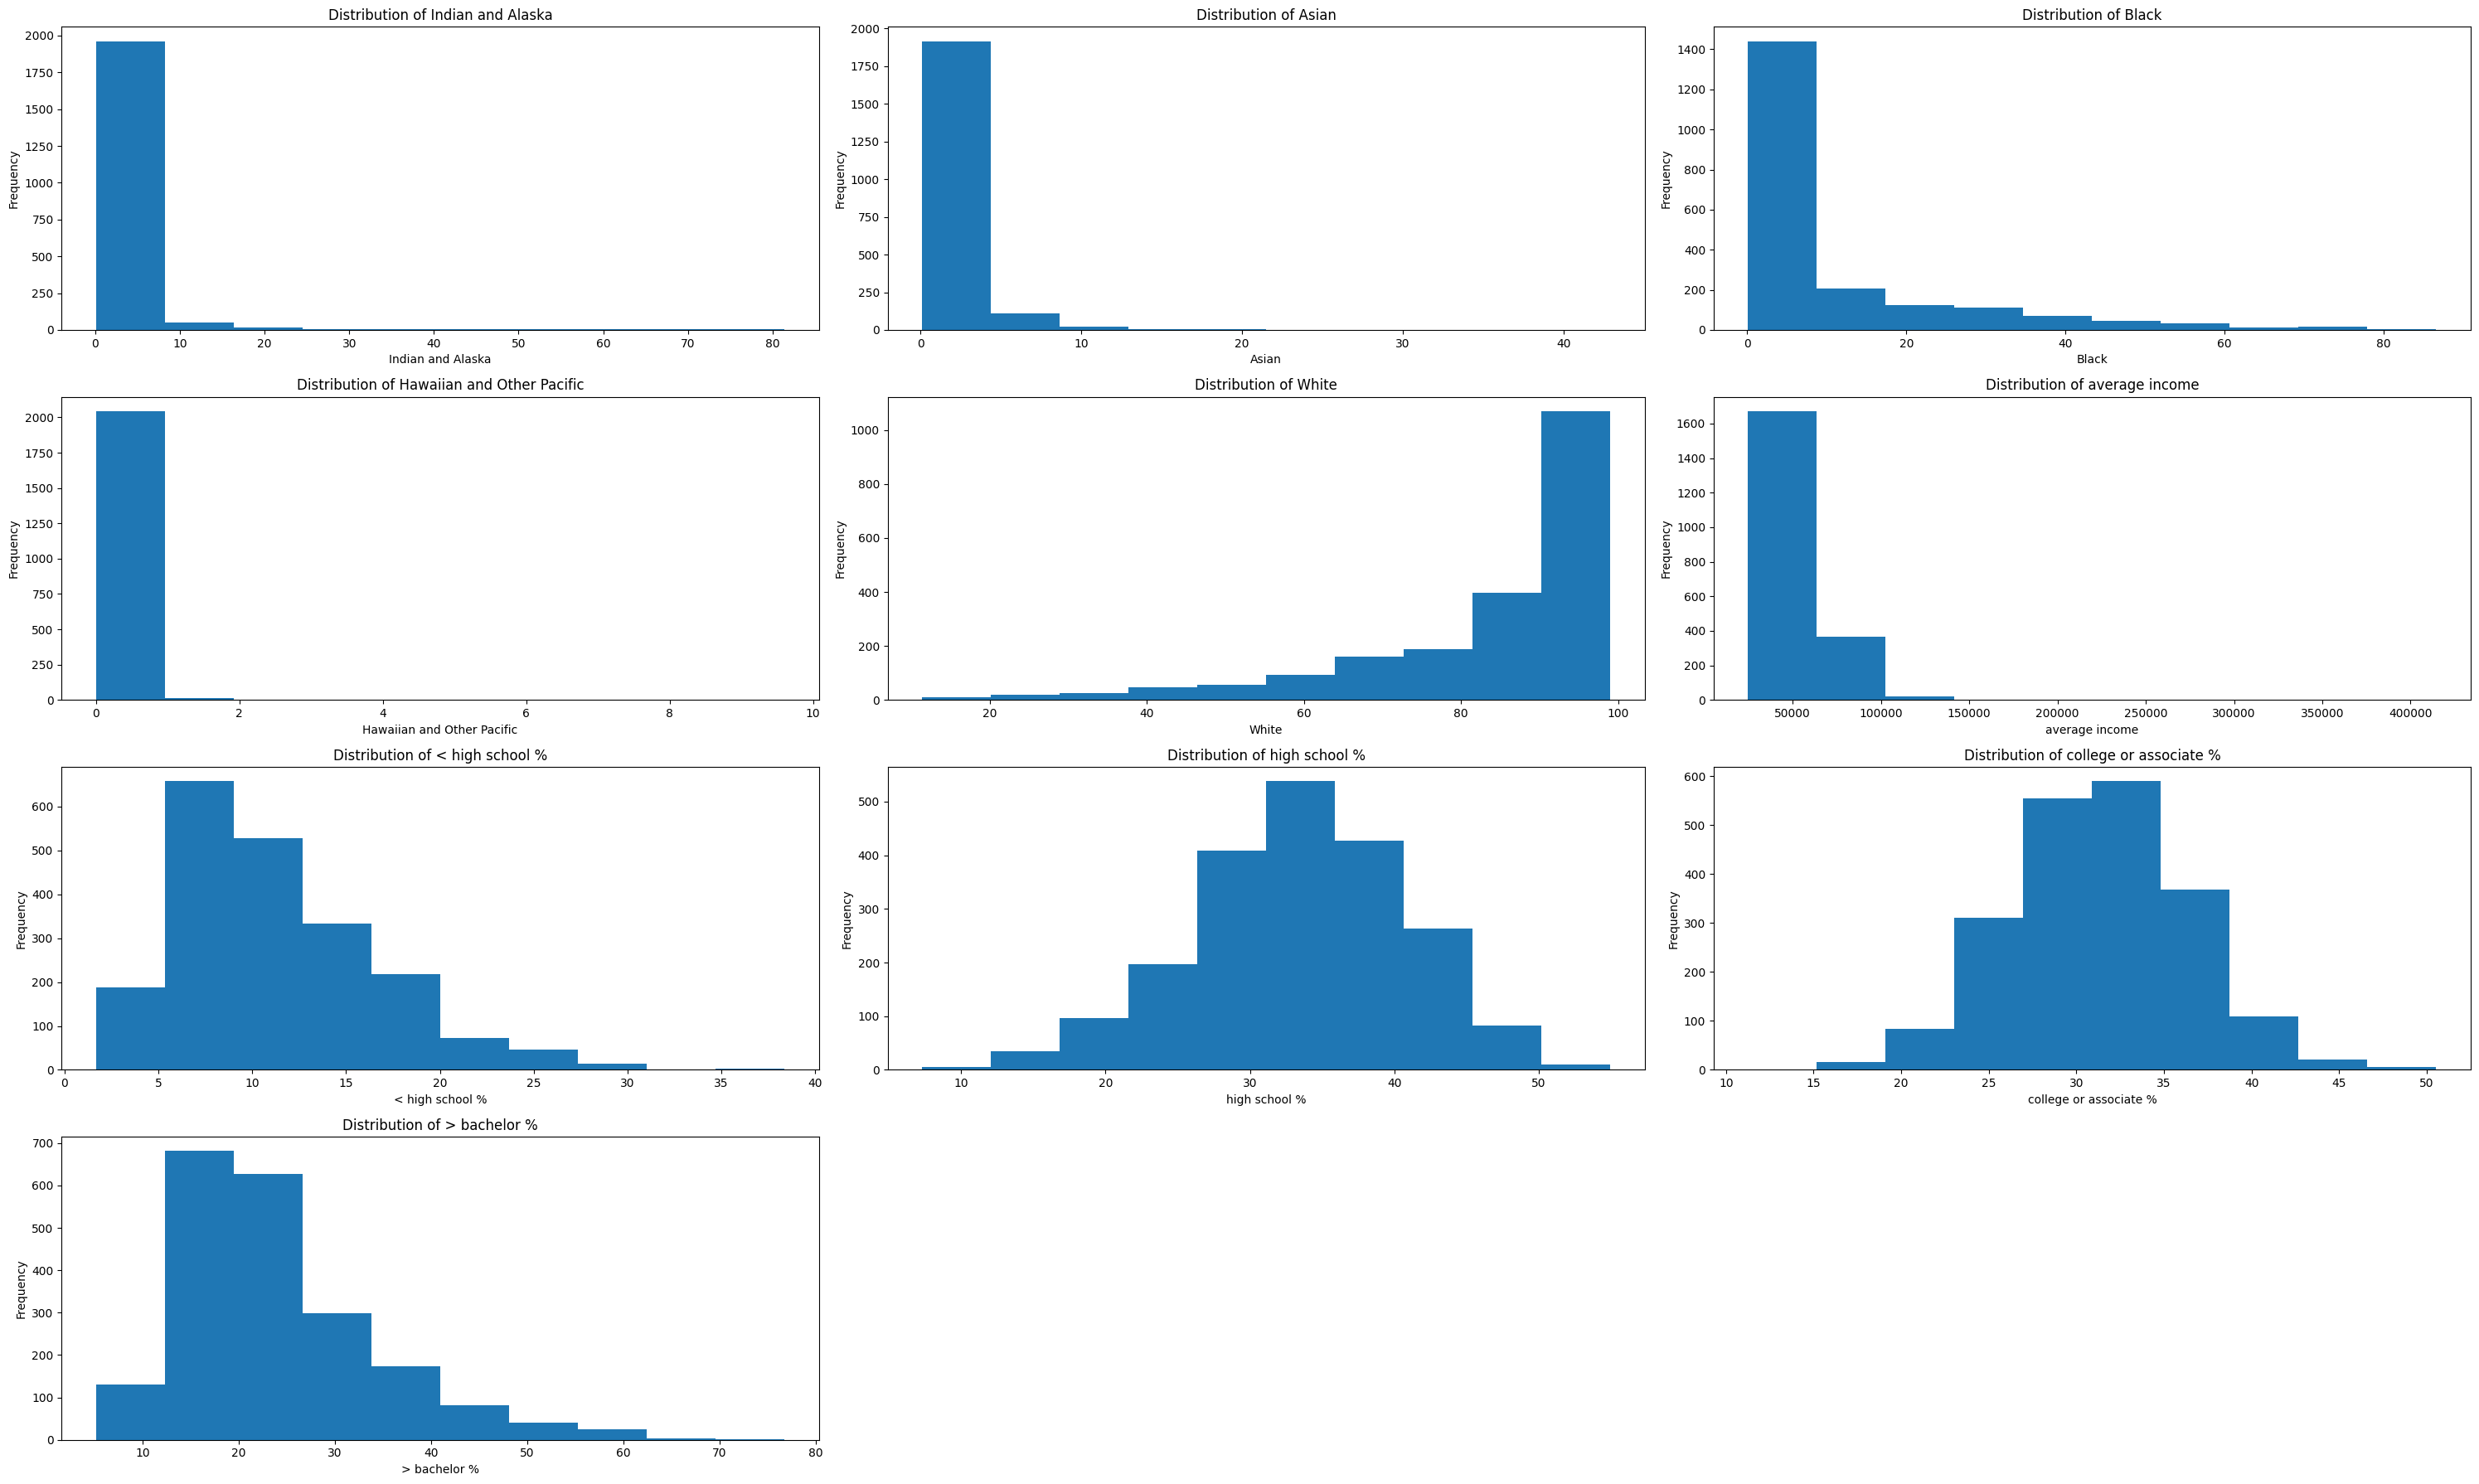

In [ ]:
plt.figure(figsize=(30,18))

plt.subplot(4,3,1)
plt.hist(df_reg1['Indian and Alaska'])
plt.title('Distribution of Indian and Alaska')
plt.xlabel('Indian and Alaska')
plt.ylabel('Frequency')

plt.subplot(4,3,2)
plt.hist(df_reg1['Asian'])
plt.title('Distribution of Asian')
plt.xlabel('Asian')
plt.ylabel('Frequency')

plt.subplot(4,3,3)
plt.hist(df_reg1['Black'])
plt.title('Distribution of Black')
plt.xlabel('Black')
plt.ylabel('Frequency')

plt.subplot(4,3,4)
plt.hist(df_reg1['Hawaiian and Other Pacific'])
plt.title('Distribution of Hawaiian and Other Pacific')
plt.xlabel('Hawaiian and Other Pacific')
plt.ylabel('Frequency')

plt.subplot(4,3,5)
plt.hist(df_reg1['White'])
plt.title('Distribution of White')
plt.xlabel('White')
plt.ylabel('Frequency')

plt.subplot(4,3,6)
plt.hist(df_reg1['average income'])
plt.title('Distribution of average income')
plt.xlabel('average income')
plt.ylabel('Frequency')

plt.subplot(4,3,7)
plt.hist(df_reg1['< high school %'])
plt.title('Distribution of < high school %')
plt.xlabel('< high school %')
plt.ylabel('Frequency')

plt.subplot(4,3,8)
plt.hist(df_reg1['high school %'])
plt.title('Distribution of high school %')
plt.xlabel('high school %')
plt.ylabel('Frequency')

plt.subplot(4,3,9)
plt.hist(df_reg1['college or associate %'])
plt.title('Distribution of college or associate %')
plt.xlabel('college or associate %')
plt.ylabel('Frequency')

plt.subplot(4,3,10)
plt.hist(df_reg1['> bachelor %'])
plt.title('Distribution of > bachelor %')
plt.xlabel('> bachelor %')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Conclusion: 

In [ ]:
# Transfer


#### 1.4.3.2 Linearity

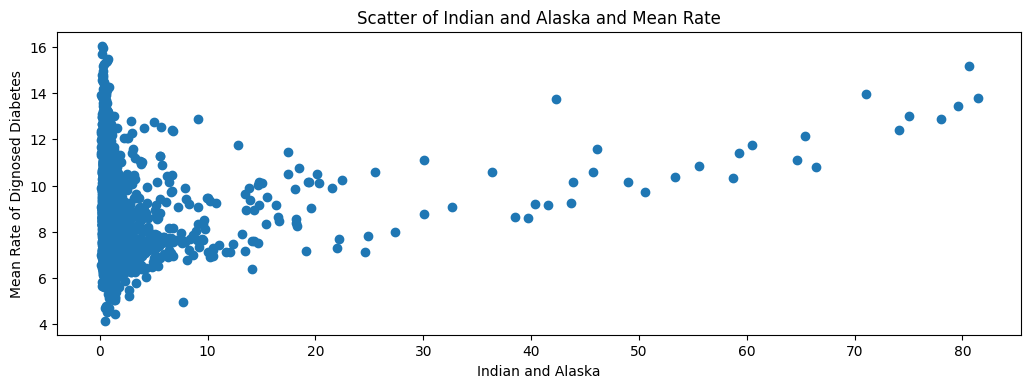

In [ ]:
X = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White', 'average income', 
             '< high school %', 'high school %', 'college or associate %', '> bachelor %']]
plt.figure(figsize=(30,18))

plt.subplot(5,3,1)
plt.scatter(df_reg1['Indian and Alaska'], df_reg1['mean rate'])
plt.title('Scatter of Indian and Alaska and Mean Rate')
plt.xlabel('Indian and Alaska')
plt.ylabel('Mean Rate of Dignosed Diabetes')



plt.tight_layout()
plt.show()